In [1]:
# Keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras import regularizers
from keras.optimizers import SGD, RMSprop, Nadam,Adadelta
from keras.utils import np_utils


# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt

2023-06-30 16:47:03.104839: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-30 16:47:03.149071: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-30 16:47:03.149843: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 16:47:03.993889: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Load Data

In [2]:
from keras.datasets import mnist

In [3]:
(xi_load,yi_load), (xf_load,yf_load) = mnist.load_data()

In [4]:
xi_load.shape

(60000, 28, 28)

In [5]:
# One hot encoding
yi = np_utils.to_categorical(yi_load)
yf = np_utils.to_categorical(yf_load)

In [6]:
yi[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

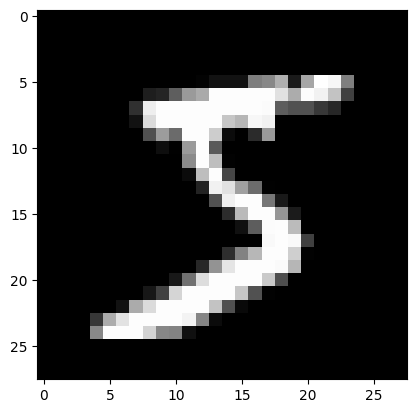

In [7]:
plt.imshow(xi_load[0], cmap='gray')

In [8]:
# 2D to 1D
xi_reshape = xi_load.reshape((int(len(xi_load)),28*28))
xf_reshape = xf_load.reshape((int(len(xf_load)),28*28))

# Normalization
xi = xi_reshape.astype('float16')/255
xf = xf_reshape.astype('float16')/255

# Keras

In [9]:
# Model
model = Sequential()

# Layers
dense = Dense(30, input_dim=28*28, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.L2(l2=0.01))
model.add(dense)

dense = Dense(30, kernel_initializer='normal', activation='relu')
model.add(dense)
model.add(Dropout(0.2))
dense = Dense(10, kernel_initializer='normal', activation='softmax')
model.add(dense)

# Optimizer
# optimizerValue = SGD(learning_rate=0.01,
#                      momentum=0.9,
#                      nesterov=True)

# optimizerValue = RMSprop(learning_rate=0.01,
#                      rho=0.9,
#                      momentum=0.0,)

optimizerValue = Nadam(learning_rate=0.001,
                      beta_1=0.9,
                      beta_2=0.999)

# optimizerValue = Adadelta(learning_rate=0.001,
#                           rho=0.95)
model.compile(loss='categorical_crossentropy', optimizer= optimizerValue, metrics=['acc'])     

2023-06-30 16:47:07.104553: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [10]:
# doc
# https://keras.io/api/optimizers/

In [11]:
# Fit the model
hist = model.fit(xi, yi, epochs=10, batch_size=70, validation_data=(xf,yf), verbose=1, workers=8, use_multiprocessing=True)

Epoch 1/10
858/858 [==============================] - 4s 3ms/step - loss: 0.8965 - acc: 0.7804 - val_loss: 0.4827 - val_acc: 0.8969
Epoch 2/10
858/858 [==============================] - 3s 3ms/step - loss: 0.4818 - acc: 0.8936 - val_loss: 0.3826 - val_acc: 0.9192
Epoch 3/10
858/858 [==============================] - 3s 3ms/step - loss: 0.3866 - acc: 0.9175 - val_loss: 0.3791 - val_acc: 0.9094
Epoch 4/10
858/858 [==============================] - 3s 3ms/step - loss: 0.3379 - acc: 0.9290 - val_loss: 0.3079 - val_acc: 0.9271
Epoch 5/10
858/858 [==============================] - 3s 3ms/step - loss: 0.3081 - acc: 0.9351 - val_loss: 0.2569 - val_acc: 0.9441
Epoch 6/10
858/858 [==============================] - 3s 3ms/step - loss: 0.2896 - acc: 0.9389 - val_loss: 0.2480 - val_acc: 0.9470
Epoch 7/10
858/858 [==============================] - 3s 3ms/step - loss: 0.2774 - acc: 0.9412 - val_loss: 0.2307 - val_acc: 0.9514
Epoch 8/10
858/858 [==============================] - 3s 3ms/step - loss: 0.

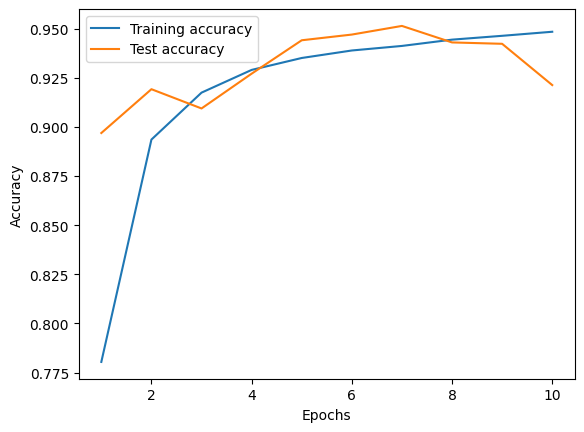

In [12]:
acc = hist.history["acc"]
val_acc = hist.history["val_acc"]

# Ploting
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label="Training accuracy")
plt.plot(epochs, val_acc, label="Test accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
predict = model.predict(xf)

313/313 [==============================] - 0s 1ms/step


In [14]:
# np.set_printoptions(formatter={'int': lambda x: "{0:d}".format(x)})
# np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
# print(predict)

In [15]:
# Output to class
maxId = np.argmax(predict,axis=1)
predictClass = np_utils.to_categorical(maxId)

# CONFUSSION MATRIX
"""
Verdadeiro positivo | Falso Positivo
Falso Negativo      | Verdadeiro Negativo
"""

# Matriz de confusão multlabel
def multilabel_confusion_matrix(y_true, y_pred):
    n_labels = y_true.shape[1]
    confusion_matrices = np.zeros((n_labels, 2, 2))

    for label in range(n_labels):
        confusion_matrices[label] = confusion_matrix(y_true[:, label], y_pred[:, label])

    return confusion_matrices

# Calcula a matriz de confusão multlabel
confusion_matrices = multilabel_confusion_matrix(yf, predictClass)

# Exibe as matrizes de confusão
for label, confusion_matrix in enumerate(confusion_matrices):
    print(f"Label {label}:")
    print(confusion_matrix)
    print()


Label 0:
[[9003.   17.]
 [  37.  943.]]

Label 1:
[[8844.   21.]
 [  31. 1104.]]

Label 2:
[[8899.   69.]
 [  40.  992.]]

Label 3:
[[8577.  413.]
 [  15.  995.]]

Label 4:
[[8988.   30.]
 [  59.  923.]]

Label 5:
[[9021.   87.]
 [  89.  803.]]

Label 6:
[[8996.   46.]
 [  50.  908.]]

Label 7:
[[8937.   35.]
 [  59.  969.]]

Label 8:
[[9013.   13.]
 [ 337.  637.]]

Label 9:
[[8935.   56.]
 [  70.  939.]]

